# More Regression Methods Assignment

### Predicting Housing Price
This dataset includes 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa and will challenges you to predict the final price of each home. Description for each feature can be found in the attached "House Price data_description.txt" file.

For this assignment, first do some initial cleansing of the data (you need to deal with the missing values) and create a heatmap to visualize the correlation of features with respect to the price. Encode the categorical variables using the MultiColumnLabelEncoder (class has been defined in this notebook, just write your code to apply this function). Select 10 features (including both numerical and categorical) to train four models: a regularized Lasso Regression model, a regularized Ridge Regression model, SVR and Regression Tree. Customize the snippet provided in the class meeting to compare the performance of the four models. Display the RMSE and their performance curve on a 10-fold CV basis.

In [2]:
#import individual packages:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
#Or:
from mlwpy import *
%matplotlib inline

In [3]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [4]:
def get_model_name(model):
    ' return name of model (class) as a string '
    return str(model.__class__).split('.')[-1][:-2]

In [5]:
#load your data:
housing = pd.read_csv("House_Price.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
housing.shape

(1460, 81)

In [8]:
#write your code and organize the notebook to complete this assignment:
pd.set_option('display.max_columns', None) #these two lines are used to display all columns and rows at all times, found from https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe
pd.set_option('display.max_rows', None)

In [9]:
housing.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
from sklearn.preprocessing import LabelEncoder
housing_1=housing.apply(LabelEncoder().fit_transform)
housing_1=MultiColumnLabelEncoder(columns = ["MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]).fit_transform(housing)

In [11]:
housing_1.head() #No categorical varibles remain 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000


In [12]:
housing_1.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [ ]:
#After encoding the categorical variables, there are only three columns with missing values: LotFrontage, MassVnrArea GarageYrBlt.
#LotFrontage describes the linear feet of street connected to property, and we will fill NANs in this column with the column mean
#MasVnrArea is the masonry veneer area in square feet, a NAN likely means there is no MasVnrType, so we will replace the NANs with 0s
#GarageYrBlt defines the year the garage was built, a missing value here likely means there is either no data or the house does not have a garage
#We will fill the NANs in this column with 0s to keep with the logic that houses with no garages or older garages should be less valuable

In [13]:
housing_1["LotFrontage"] = housing_1["LotFrontage"].fillna(housing_1["LotFrontage"].mean())
housing_1["MasVnrArea"] = housing_1["MasVnrArea"].fillna(0)
housing_1["GarageYrBlt"] = housing_1["GarageYrBlt"].fillna(0)

In [14]:
housing_1.isna().sum().sum() #Now there are no missing values

0

In [15]:
housing_1[housing_1.columns[1:]].corr()['SalePrice'][:].sort_values(ascending=False)#https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr     0.168213
Fence            0.140640
Alley            0.139868
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
ScreenPorch      0.111447
Exterior2nd 

In [16]:
housing_1.shape

(1460, 81)

In [17]:
housing_1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,5,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4,250000


In [18]:
X = housing_1.loc[:,['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'ExterQual', 'BsmtQual', 'KitchenQual', 'TotRmsAbvGrd']]
y = housing_1.loc[:,'SalePrice']

In [19]:
print(y.shape)
print(X.shape)

(1460,)
(1460, 10)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=0)

/var/folders/hp/044b3d290pl4z6jb7_7cnfm40000gp/T/ipykernel_31392/214675210.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax = sns.heatmap(correlation[:, np.newaxis], annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)


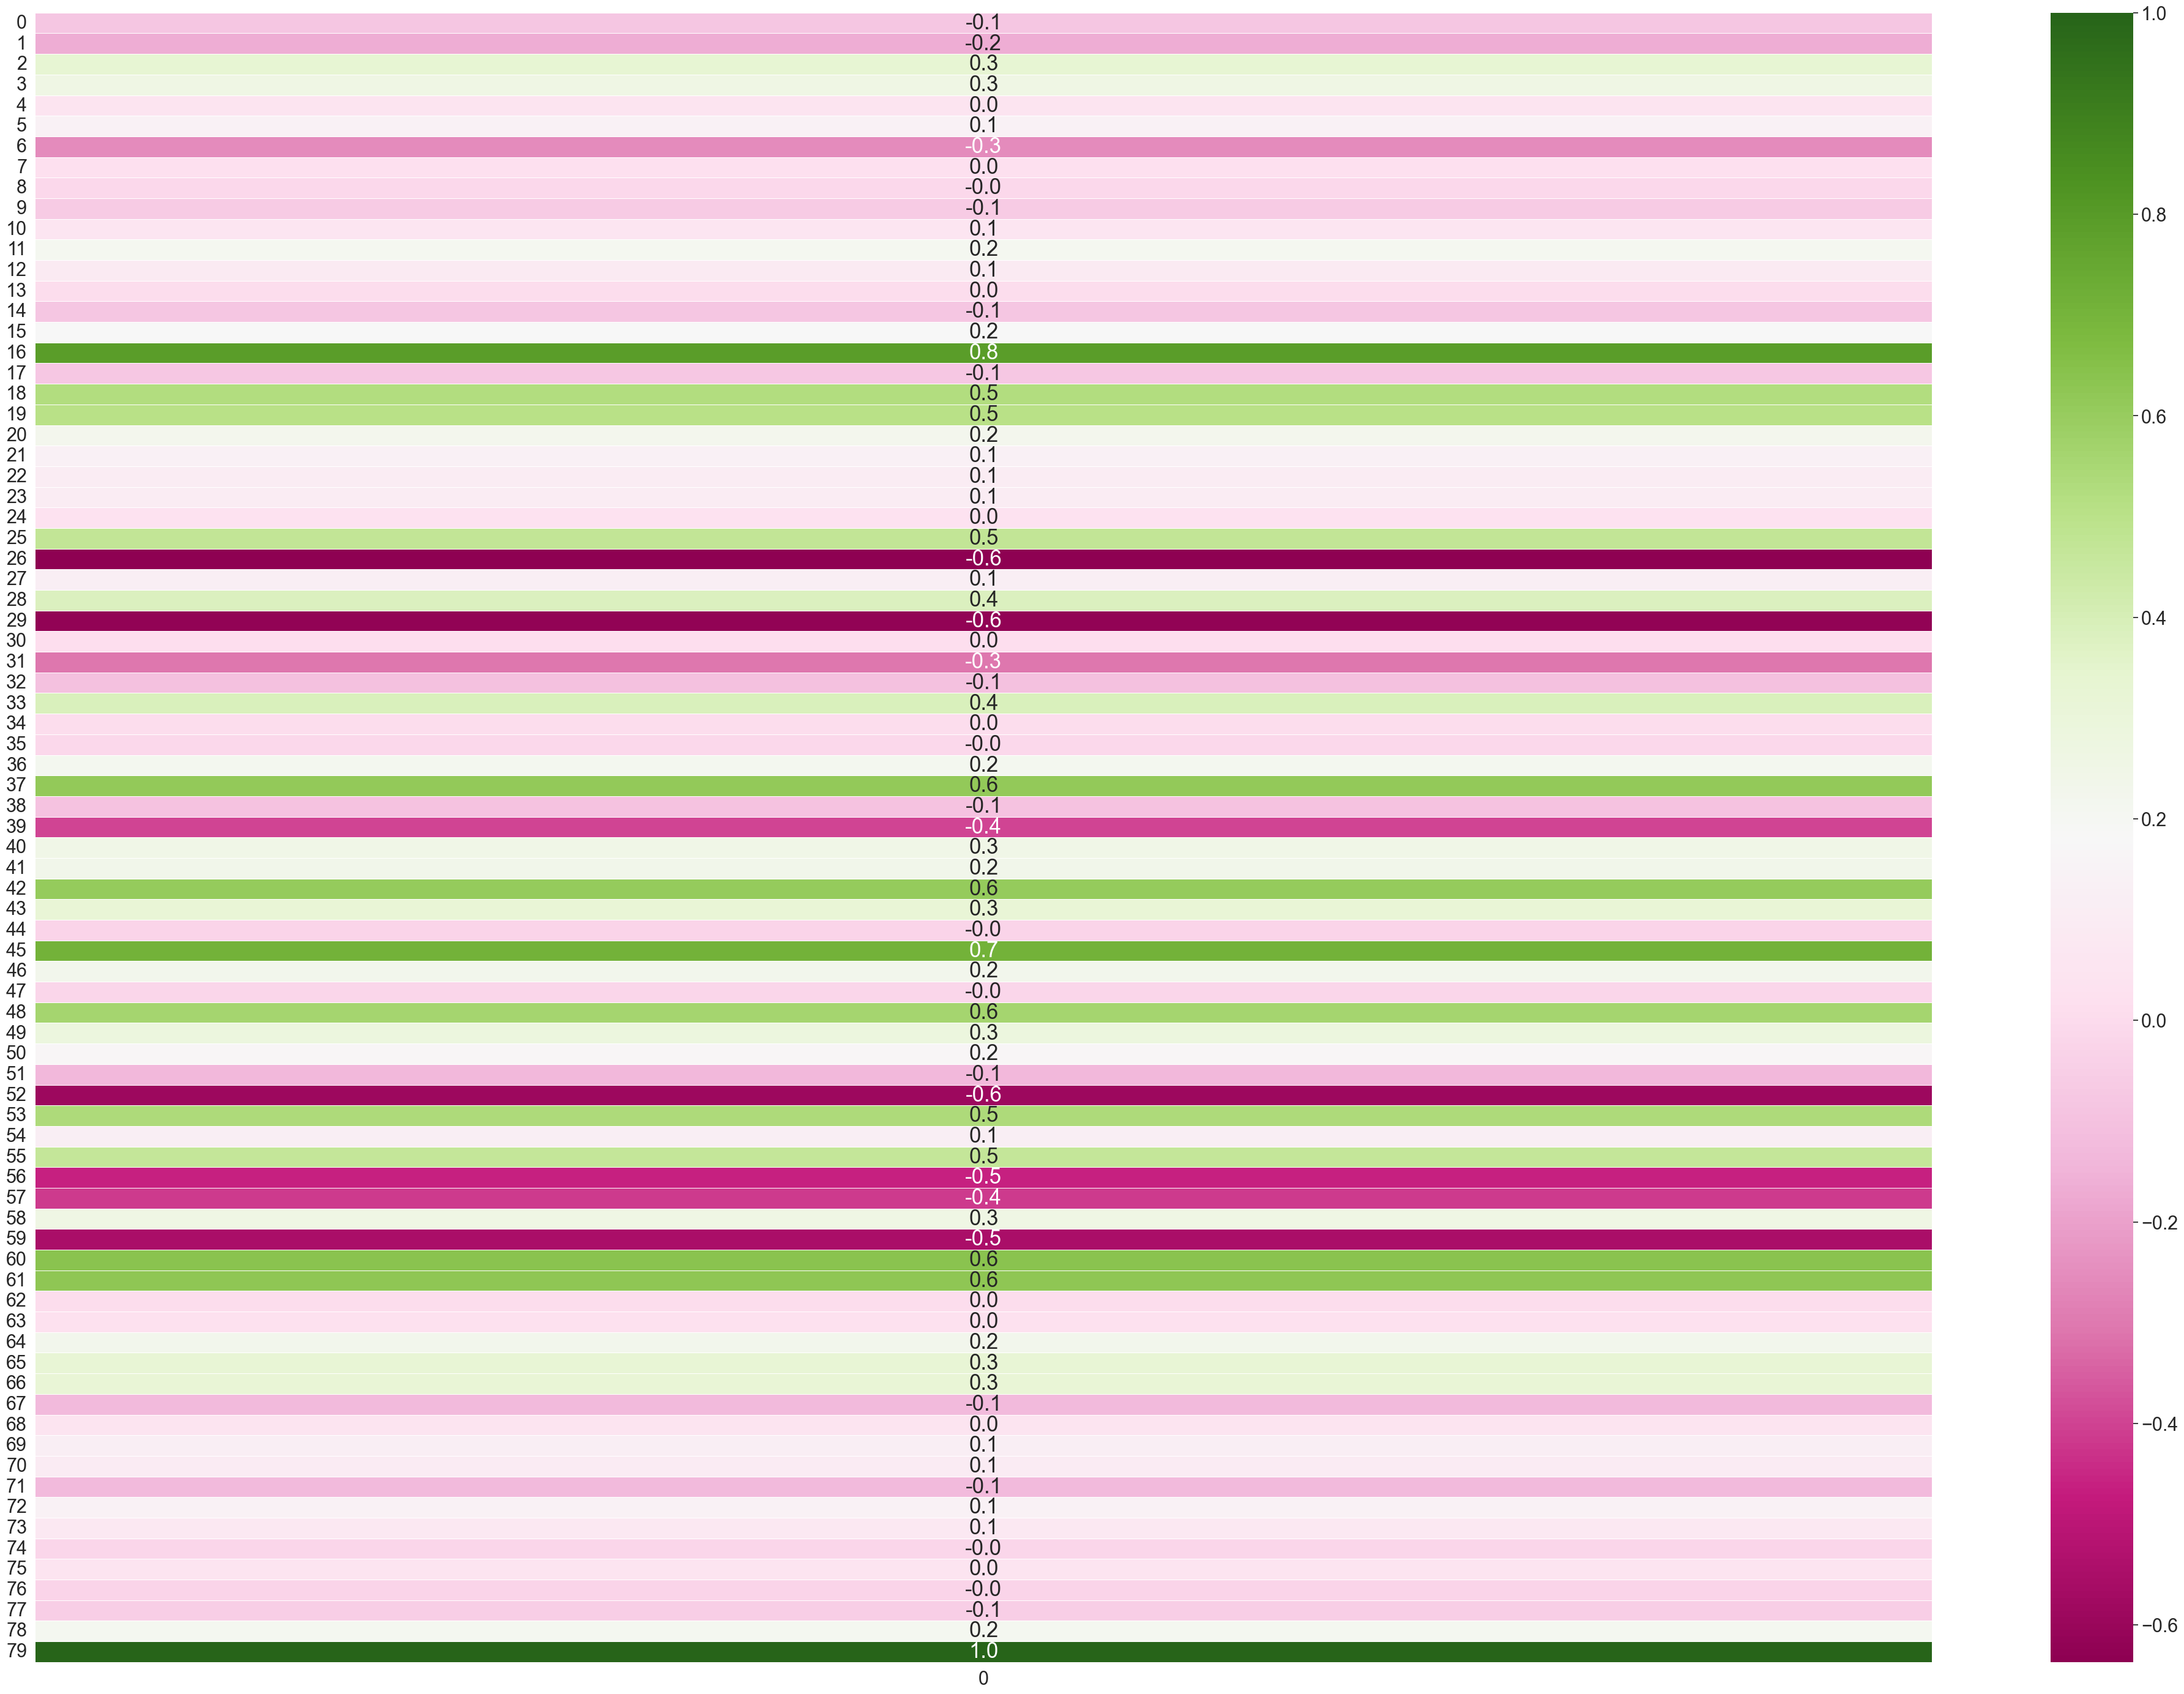

In [24]:
correlation=housing_1[housing_1.columns[1:]].corr()['SalePrice'][:]
sns.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sns.heatmap(correlation[:, np.newaxis], annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5) #found from https://itecnote.com/tecnote/python-inconsistent-shape-between-the-condition-and-the-input-while-using-seaborn/

In [136]:
models = [linear_model.Lasso(),            
          linear_model.Ridge()] 
for model in models:
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds  = model.predict(X_test)
    print(get_model_name(model), 
          "\nTrain MSE:",metrics.mean_squared_error(y_train, 
                                                    train_preds), 
          "\n Test MSE:", metrics.mean_squared_error(y_test,  
                                                     test_preds),
          "\n Coefficients:", model.coef_)

Lasso 
Train MSE: 1149684390.1364944 
 Test MSE: 1880664229.9295964 
 Coefficients: [ 15346.56398737     50.71275803  13321.42528022     23.38077412
     17.56652331  -3819.81772918  -9186.92344727 -11074.00794876
  -8905.98055951   -913.57783874]
Ridge 
Train MSE: 1149685169.250834 
 Test MSE: 1880966980.326 
 Coefficients: [ 15341.04713951     50.72825357  13294.1444194      23.41396856
     17.55797568  -3785.63914394  -9175.56203501 -11067.03490418
  -8905.25275481   -916.43322735]


In [141]:
svrs = [svm.SVR(gamma='auto'),   
        svm.NuSVR(gamma='auto')] 

for model in svrs:
    preds = (model.fit(X_train, y_train)
                  .predict(X_test))
    print(metrics.mean_squared_error(y_test, preds))

6962340125.441157
6682609461.265004


In [143]:
dtrees = [tree.DecisionTreeRegressor(max_depth=md) for md in [1, 3, 5, 10]]

for model in dtrees:
    preds = (model.fit(X_train, y_train)
                  .predict(X_test))
    mse = metrics.mean_squared_error(y_test, preds)
    fmt = "{} {:2d} {:4.0f}"
    print(fmt.format(get_model_name(model),
                     model.get_params()['max_depth'],
                     mse))

DecisionTreeRegressor  1 3524722247
DecisionTreeRegressor  3 2021269780
DecisionTreeRegressor  5 1161615197
DecisionTreeRegressor 10 1104282314


In [145]:
old_school = [linear_model.LinearRegression(),
              neighbors.KNeighborsRegressor(n_neighbors=3),
              neighbors.KNeighborsRegressor(n_neighbors=10)]
penalized_lr = [linear_model.Lasso(), 
                linear_model.Ridge()]

svrs = [svm.SVR(), svm.NuSVR()] 

dtrees = [tree.DecisionTreeRegressor(max_depth=md) for md in [1, 3, 5, 10]]

reg_models = old_school + penalized_lr + svrs + dtrees

In [147]:
def rms_error(actual, predicted):
    ' root-mean-squared-error function '
    mse = metrics.mean_squared_error(actual, predicted)    
    return np.sqrt(mse)
rms_scorer = metrics.make_scorer(rms_error)

In [148]:
scaler = skpre.StandardScaler()

scores = {}
for model in reg_models:
    pipe = pipeline.make_pipeline(scaler, model)
    preds = skms.cross_val_predict(pipe, 
                                   X, y, 
                                   cv=10)
    key = (get_model_name(model) + 
           str(model.get_params().get('max_depth', "")) + 
           str(model.get_params().get('n_neighbors', "")))
    scores[key] = rms_error(y, preds)

df = pd.DataFrame.from_dict(scores, orient='index').sort_values(0)
df.columns=['RMSE']
display(df)

,RMSE
KNeighborsRegressor10,35025.037947
Ridge,37200.317412
Lasso,37203.025681
LinearRegression,37203.313598
KNeighborsRegressor3,37439.078856
DecisionTreeRegressor5,37613.997082
DecisionTreeRegressor10,39560.693411
DecisionTreeRegressor3,44580.674896
DecisionTreeRegressor1,58794.004521
NuSVR,79901.191635


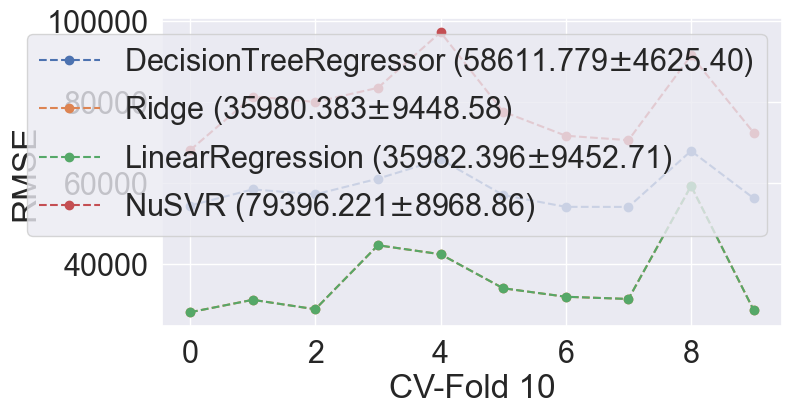

In [152]:
better_models = [tree.DecisionTreeRegressor(max_depth=1),
                 linear_model.Ridge(),
                 linear_model.LinearRegression(),
                 svm.NuSVR()]

fig, ax = plt.subplots(1, 1, figsize=(8,4))
for model in better_models:
    pipe = pipeline.make_pipeline(scaler, model)    
    cv_results = skms.cross_val_score(pipe, 
                                      X, y, 
                                      scoring = rms_scorer, 
                                      cv=10)

    my_lbl = "{:s} ({:5.3f}$\pm${:.2f})".format(get_model_name(model), 
                                                cv_results.mean(), 
                                                cv_results.std())
    ax.plot(cv_results, 'o--', label=my_lbl)
    ax.set_xlabel('CV-Fold 10')
    ax.set_ylabel("RMSE")
    ax.legend()

In [ ]:
#From the above plot and the scores, we see that our best performing model is Ridge, with Lasso and Linear Regression
#being very close. Our overall best model was 10NN regressor, and our worst was SVR. However, overall it seems that
#all the RMSE are very high. 